# Basic Image Processing with SciPy in Python

## Introduction

In this notebook, we focus on **basic image processing operations using SciPy**, a library that is part of the **NumPy ecosystem**. While SciPy is *not specifically designed* for image processing, it still provides useful tools for simple operations such as:

- Image I/O (historically)
- Geometric transformations (flip, rotate)
- Filtering (uniform, Gaussian, median)
- Edge detection (Sobel)

Later notebooks move on to libraries **designed specifically for image processing**, such as **scikit-image** and **OpenCV**.

---


## SciPy in the NumPy Stack

SciPy builds on NumPy and provides modules for:

- Linear algebra
- Optimization
- FFT (Fast Fourier Transform)
- Signal processing
- Image processing (as a subset of signal processing)

Because SciPy operates on NumPy arrays, **any image loaded with SciPy (or compatible libraries) is represented as a NumPy array**.

---

## Reading Images

### Using SciPy (Deprecated)

Historically, images were read using:

`from scipy import misc`   
`img = misc.imread("doplerUS.jpg")`   

However, `misc.imread` has been deprecated and removed in newer versions of SciPy. This is one reason many users prefer alternative libraries.   

Alternative: **scikit-image**   
A safer and more modern approach is to use scikit-image:

In [2]:
from skimage import io

img = io.imread("doplerUS.jpg")

The loaded image is a NumPy array:

In [3]:
type(img)
# <class 'numpy.ndarray'>

numpy.ndarray

### Understanding Image Properties

Since images are NumPy arrays, we can inspect them easily.

In [7]:
# Shape: (194, 259, 3) → RGB image
print(F"Shape: {img.shape}")

# Data type: uint8 → values from 0 to 255
print(F"Type: {img.dtype}")

Shape: (194, 259, 3)
Type: uint8


### Converting to Grayscale

In [10]:
img_gray = io.imread("doplerUS.jpg", as_gray=True)

print(F"Shape: {img_gray.shape}")
print(F"Type: {img_gray.dtype}")

Shape: (194, 259)
Type: float64


Key changes:

- Shape becomes (194, 259)
- Data type becomes float64
- Pixel values are normalized between 0 and 1

To convert back to 8-bit:

In [11]:
from skimage import img_as_ubyte
img_gray_8bit = img_as_ubyte(img_gray)

print(F"Type: {img_gray_8bit.dtype}")

Type: uint8


### Accessing Pixel Values

Single pixel (grayscale):

In [12]:
img_gray[0, 0]

np.float64(0.00392156862745098)

Single pixel (RGB):

In [13]:
img[0, 0]  # returns [R, G, B]

array([1, 1, 1], dtype=uint8)

Extracting a region (image slicing / cropping):

In [14]:
img_gray[10:20, 15:25]

array([[0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157],
       [0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157],
       [0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157],
       [0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157],
       [0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157],
       [0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157],
       [0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.00392157, 0.00392157, 0.00392157, 0.00392157],
       [0.00392157, 0.00392157, 0.0039215

### Basic Image Statistics

Because images are arrays, NumPy statistics work directly:

In [15]:
min_val = img_gray.min()
max_val = img_gray.max()
mean_val = img_gray.mean()

print(f"Minimum: {min_val}")
print(f"Maximum: {max_val}")
print(f"Mean: {mean_val}")


Minimum: 0.0
Maximum: 0.992083137254902
Mean: 0.15598498373102376


### Image Flipping with NumPy

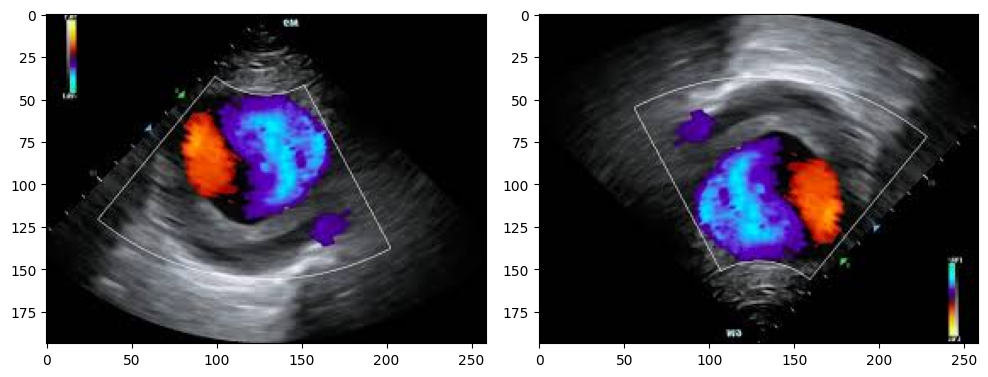

In [16]:
import numpy as np
import matplotlib.pyplot as plt

flip_lr = np.fliplr(img)
flip_ud = np.flipud(img)

fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes[0].imshow(flip_lr)
axes[1].imshow(flip_ud)

plt.tight_layout()
plt.show()


### Displaying Multiple Images with Matplotlib

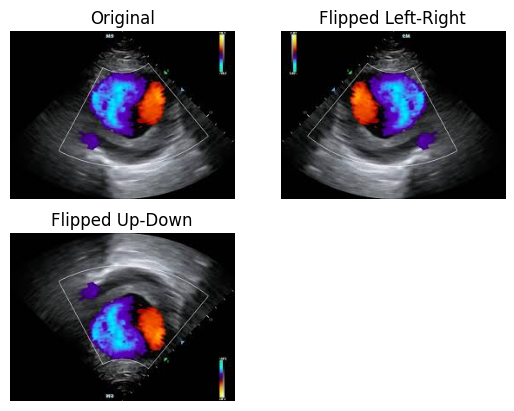

In [20]:
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.axis("off")
plt.title("Original")

plt.subplot(2, 2, 2)
plt.imshow(flip_lr)
plt.axis("off")
plt.title("Flipped Left-Right")

plt.subplot(2, 2, 3)
plt.imshow(flip_ud)
plt.axis("off")
plt.title("Flipped Up-Down")

plt.show()

### Colormaps in Matplotlib

Colormaps control how intensity values are mapped to colors.

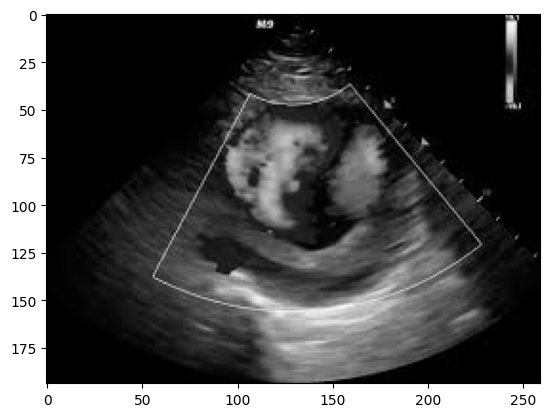

In [23]:
plt.imshow(img_gray, cmap="gray")

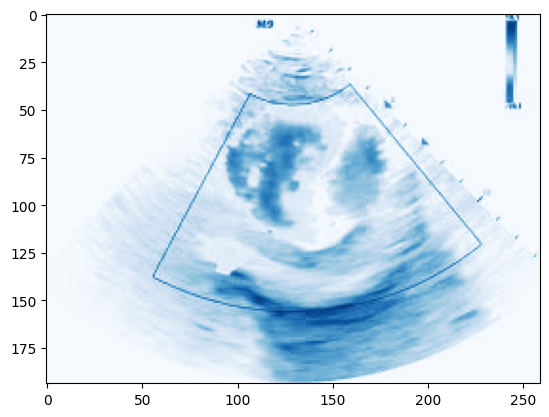

In [24]:
plt.imshow(img_gray, cmap="Blues")

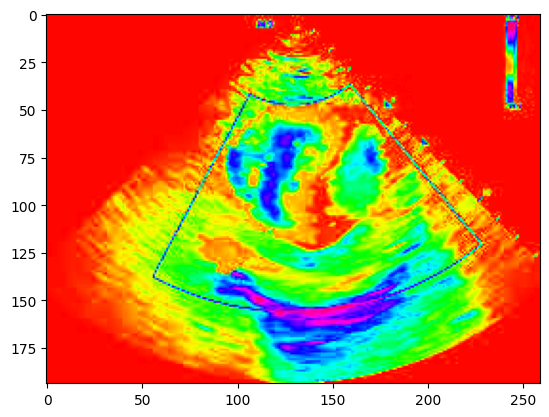

In [25]:
plt.imshow(img_gray, cmap="hsv")

Choosing the right colormap is especially important for:

- Segmentation results
- Feature highlighting
- Scientific visualization

Matplotlib provides a wide variety of colormaps for different data types.

### Image Rotation with SciPy

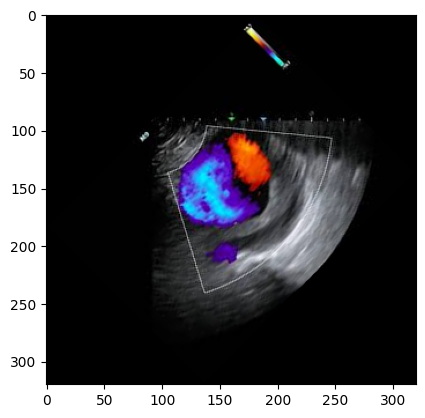

In [26]:
from scipy import ndimage

rotated = ndimage.rotate(img, angle=45)
plt.imshow(rotated)

Prevent resizing (keep original shape):

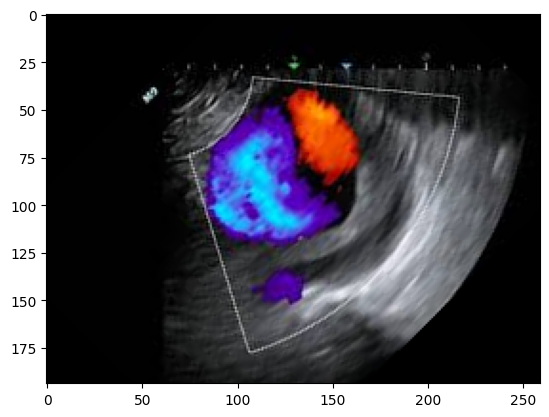

In [28]:
rotated = ndimage.rotate(img, angle=45, reshape=False)
plt.imshow(rotated)

### Image Filtering with `scipy.ndimage`

SciPy provides several classic filters.

#### 1. Uniform (Mean) Filter

A simple averaging (blurring) filter:

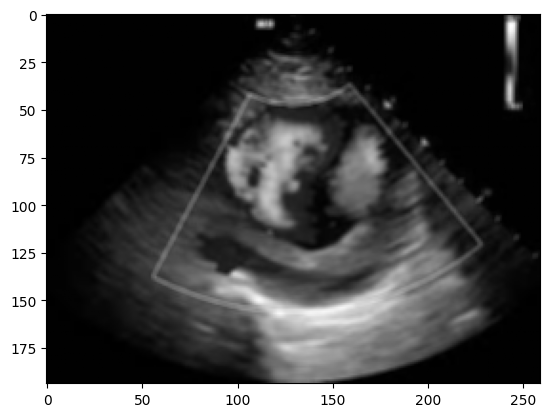

In [29]:
from scipy import ndimage

uniform_filtered = ndimage.uniform_filter(img_gray, size=3)
plt.imshow(uniform_filtered, cmap="gray")

Increasing the size increases blur:

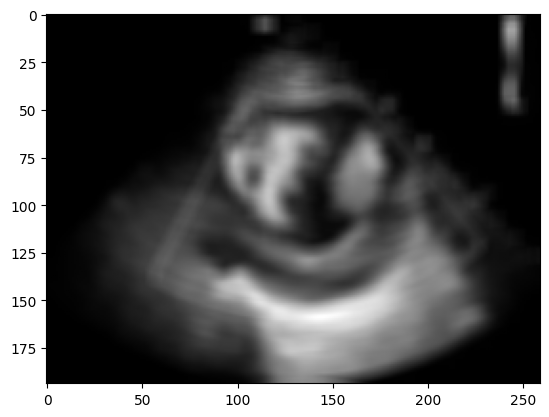

In [31]:
uniform_filtered = ndimage.uniform_filter(img_gray, size=9)
plt.imshow(uniform_filtered, cmap="gray")

#### 2. Gaussian Filter

Gaussian filtering is widely used for noise reduction, but it also blurs edges.

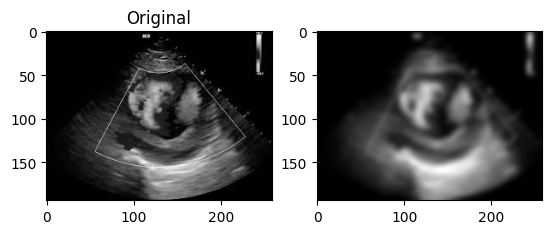

In [41]:
from scipy import ndimage

gaussian_filtered = ndimage.gaussian_filter(img_gray, sigma=3)

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap = "gray")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(gaussian_filtered, cmap="gray")

Heavier smoothing:

Text(0.5, 1.0, 'Sigma: 11')

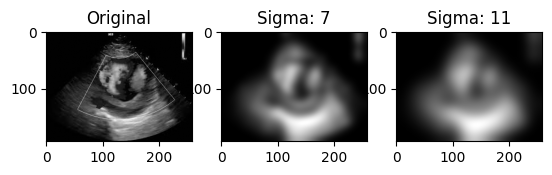

In [38]:
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap="gray")
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(ndimage.gaussian_filter(img_gray, sigma=7), cmap="gray")
plt.title("Sigma: 7")

plt.subplot(1, 3, 3)
plt.imshow(ndimage.gaussian_filter(img_gray, sigma=11), cmap="gray")
plt.title("Sigma: 11")

Conceptually:

- Uniform filter → equal averaging
- Gaussian filter → weighted averaging using a Gaussian kernel

### 3. Median Filter (Edge-Preserving)

Median filters are excellent for salt-and-pepper noise and preserve edges better than Gaussian filters.

Text(0.5, 1.0, 'Median filter')

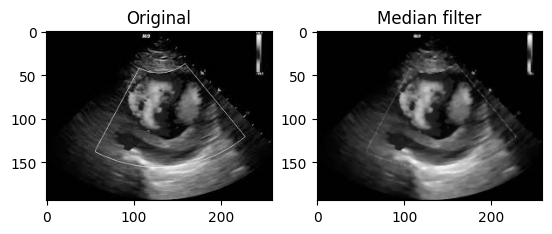

In [43]:
median_filtered = ndimage.median_filter(img_gray, size=3)

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap="gray")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(median_filtered, cmap="gray")
plt.title("Median filter")

This works especially well on noisy microscopy images.

### Edge Detection with Sobel Filter

The Sobel operator highlights edges by computing intensity gradients.

Text(0.5, 1.0, 'Edge detected')

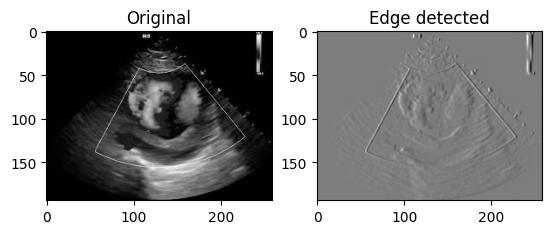

In [44]:
sobel_default = ndimage.sobel(img_gray)

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap="gray")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(sobel_default, cmap="gray")
plt.title("Edge detected")

Specify direction:

- `axis = 0` → vertical edges
- `axis = 1` → horizontal edges

Text(0.5, 1.0, 'sobel Y')

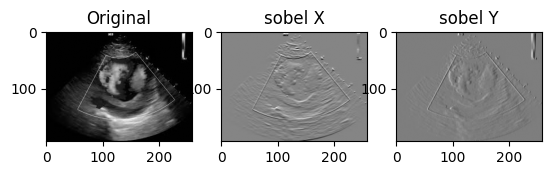

In [47]:
sobel_x = ndimage.sobel(img_gray, axis=0)
sobel_y = ndimage.sobel(img_gray, axis=1)


plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap="gray")
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(sobel_x, cmap="gray")
plt.title("sobel X")

plt.subplot(1, 3, 3)
plt.imshow(sobel_y, cmap="gray")
plt.title("sobel Y")



Edge detection works best on images with clear structural orientation.

**Beyond the Basics**

`scipy.ndimage` includes many additional operations:

- Morphology (erosion, dilation, closing)
- Interpolation
- Measurements
- Binary operations
- Distance transforms

However, for **serious image processing tasks**, SciPy is usually not the final stop.